# Hands-On-Session: Comparing subject vocabularies

### Importing relevant modules and prepared vocabularies

In [1]:
%matplotlib inline
import csv
import json
import nltk
from tabulate import tabulate
from collections import Counter, defaultdict
import string
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
!pip install polyleven
from polyleven import levenshtein

In [2]:
!git clone https://github.com/AMitiukova/vocabulary-comparison-graphics.git

Cloning into 'vocabulary-comparison-graphics'...
remote: Enumerating objects: 243, done.
remote: Counting objects: 100% (243/243), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 243 (delta 67), reused 230 (delta 59), pack-reused 0
Receiving objects: 100% (243/243), 5.44 MiB | 4.38 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [4]:
%cd /content/vocabulary-comparison-graphics/Data
with open("getty_aat.json", encoding = "utf-8") as datei:
    getty_aat = json.load(datei)
with open("rbmscv.json", encoding = "utf-8") as datei:
    rbmscv = json.load(datei)
with open("tgm2.json", encoding = "utf-8") as datei:
    tgm2 = json.load(datei)
with open("le.json", encoding = "utf-8") as datei:
    le = json.load(datei)

/content/vocabulary-comparison-graphics/Data


In [5]:
%cd /content/vocabulary-comparison-graphics/Functions
import vc

/content/vocabulary-comparison-graphics/Functions


### Choosing a set of vocabularies for comparison

For each vocabulary you want to add to the comparison, add a tuple containing (1) the code of the desired vocabulary (e.g. *dha_tax*) and (2) the name you want to be displayed for the vocabulary (e.g. _"DHA Taxonomy"_) to the _vocabs_-list below:

In [6]:
#Tipp: You can also temporarily remove irrelevant vocabularies by commenting them out.

vocabs = [
            (getty_aat, "Getty AAT"),
            (rbmscv, "RBMS"),
            (tgm2, "TGM"),
            (le, "Landscape engravings ontology")
            ]

### Taking a first look at the prepared vocabularies

The function *show(vocab)* provides an alphabetically ordered list of all keywords of a certain vocabulary (e.g. _dc_ for DARIAH Campus):

In [ ]:
vc.show(rbmscv)

The function *show_length(vocab)* provides information on the number of keywords of a single vocabulary (e.g. *dc* for DARIAH Campus), while the function *length_overview(vocabs)* returns information on all

In [9]:
vc.show_length(rbmscv)

1484


In [10]:
vc.length_overview(vocabs)

Getty AAT: 51445 keywords
RBMS: 1484 keywords
TGM: 13203 keywords
Landscape engravings ontology: 185 keywords


### Looking at overlaps between vocabularies on a keyword level

How many different keywords occur within the set of compared vocabularies? The function *keywords_distinct(vocabs)* returns the number of distinct keywords:

In [11]:
vc.keywords_distinct(vocabs)

66169

How many keywords occur in multiple vocabularies? The function *overlaps_overview(vocabs)* gives an overview of exact overlaps between the chosen vocabularies:

In [12]:
vc.overlaps_overview(vocabs)

No overlaps: 66021 keywords
Overlaps between 2 vocabularies: 148 keywords


Which keywords appear in multiple vocabularies? The function *keywords_multiple(vocabs, n)* lists all tags that appear in at least n vocabularies as well as the names of the respective vocabularies:

In [13]:
vc.keywords_multiple(vocabs, 3)

Which keywords are unique, i.e. only appear in one vocabulary? The function *keywords_single(vocabs, n)* shows all keywords that exclusively occur in one vocabulary as well as the name of the respective vocabulary, with n being the limit of shown keywords per vocabulary:

In [14]:
vc.keywords_single(vocabs, 5)

female (Getty AAT)
aṣṭāṅga (Getty AAT)
photographic retouchers (Getty AAT)
reparative description (Getty AAT)
ruling pens (Getty AAT)
3 to em spaces (RBMS)
5 to em spaces (RBMS)
Abaca fiber papers (RBMS)
Ableist works (RBMS)
Abridgements (RBMS)
3-D photographs (TGM)
3-in-1 pictures (TGM)
3-legged racing (TGM)
4-H clubs (TGM)
70s (TGM)
города (Landscape engravings ontology)
objects of art (Landscape engravings ontology)
произведения искусства (Landscape engravings ontology)
parks and country seats (Landscape engravings ontology)
парки и усадьбы (Landscape engravings ontology)


What about "gouache", "georeferenced data", "text technology", "architecture" or ... ? To find out more about the use of specific keywords, the function *search(vocabs, "word")* can be used to get information on the (non-)occurence of a keyword within the compared vocabularies:

In [ ]:
vc.search(vocabs, "gouache")

### Quantifying the similarity of vocabularies

The function *table_overlaps(vocabs)* generates a table that shows the number of absolute overlaps between each pair of vocabularies:

In [15]:
vc.table_overlaps(vocabs)

Vocabulary                       Getty AAT    RBMS    TGM    Landscape engravings ontology
-----------------------------  -----------  ------  -----  -------------------------------
Getty AAT                            51445       0      0                               21
RBMS                                     0    1484    127                                0
TGM                                      0     127  13203                                0
Landscape engravings ontology           21       0      0                              185


Additionally, as the compared vocabularies (usually) differ in length, it makes sense to (additionally) consider the percentual overlap of different vocabularies, as available via the function *table_relative(vocabs)*. In each row, it displays which percentage of a certain vocabulary is covered by each other vocabulary included in the comparison:

In [16]:
vc.table_relative(vocabs)

Vocabulary                       Getty AAT    RBMS     TGM    Landscape engravings ontology
-----------------------------  -----------  ------  ------  -------------------------------
Getty AAT                           100       0       0                                0.04
RBMS                                  0     100       8.56                             0
TGM                                   0       0.96  100                                0
Landscape engravings ontology        11.35    0       0                              100


To make these percentual overlaps more easily perceptible, the function *heatmap(vocabs)* displays them in form of a heat map:

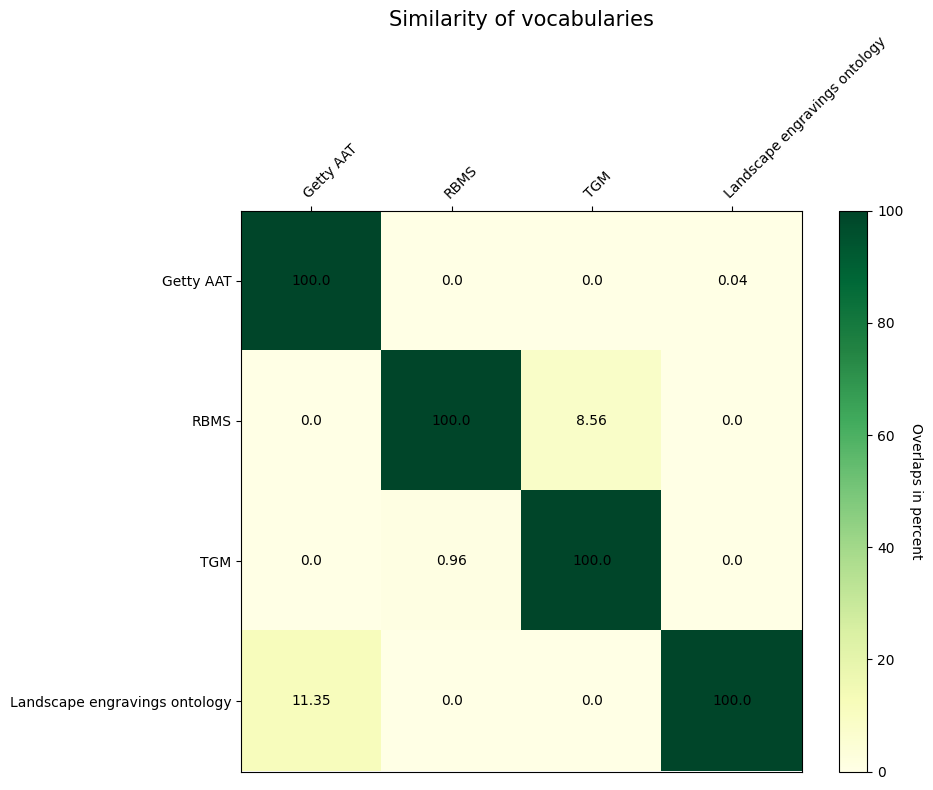

In [17]:
vc.heatmap(vocabs)

Which keywords constitute the overlap between specific vocabularies? The function _show_overlaps()_ takes a list of two or more vocabularies as its input (e.g. _[dc, howto]_ for DARIAH Campus and ACDH-CH HowTo) and returns the keywords that occur in **all** of the specified vocabularies:


In [19]:
vc.show_overlaps([le, getty_aat])

landmarks
cities
etching
earthenware
painting
series
aquarelle
drawing
man-made objects
canvas
engraving
paper
service
other
museums
colorization
porcelain
gouache
order
place
countries


### String matching vs. fuzzy matching

So far, all comparison were *based* on strict, i.e. exact matching. For certain functions (work-in-progress), the additional possibility of fuzzy matching is added, using polyleven's levensthein distance (https://github.com/fujimotos/polyleven). To explore this option, the following functions can currently be used:

In [20]:
vc.overlaps_overview_fuzzy(vocabs, 2) #overlaps on keyword level

No overlaps: 55566 keywords
Overlaps between 2 vocabularies: 10126 keywords
Overlaps between 3 vocabularies: 474 keywords
Overlaps between 4 vocabularies: 3 keywords


In [21]:
vc.search_fuzzy(vocabs, "canvas", 2) #search for matches of specific keyword

The keyword "canvas" is used in 2 different vocabularies, namely in:
['Getty AAT', 'Landscape engravings ontology']
Within the fuzzy matching, it is matched to the following variants:
[('canvas', 'Getty AAT'), ('canvas', 'Landscape engravings ontology')]


In [22]:
vc.matches(vocabs, le, 3) #lists all keywords from a certain vocabulary (here: acdhch_web) and their matches

[('landmarks', 'Getty AAT'), ('landmarks', 'Landscape engravings ontology')]
[('достопримечательности', 'Landscape engravings ontology')]
[('vitis', 'Getty AAT'), ('cozies', 'Getty AAT'), ('cotes', 'Getty AAT'), ('citrus', 'Getty AAT'), ('mites', 'Getty AAT'), ('citoles', 'Getty AAT'), ('cicims', 'Getty AAT'), ('copies', 'Getty AAT'), ('kites', 'Getty AAT'), ('tidies', 'Getty AAT'), ('cities', 'Getty AAT'), ('critics', 'Getty AAT'), ('deities', 'Getty AAT'), ('litres', 'Getty AAT'), ('titles', 'Getty AAT'), ('ritis', 'Getty AAT'), ('citizens', 'Getty AAT'), ('mitres', 'Getty AAT'), ('withies', 'Getty AAT'), ('unities', 'Getty AAT'), ('rites', 'Getty AAT'), ('sites', 'Getty AAT'), ('ties', 'Getty AAT'), ('Deities', 'TGM'), ('Duties', 'TGM'), ('Lilies', 'TGM'), ('Sites', 'TGM'), ('Tithes', 'TGM'), ('cities', 'Landscape engravings ontology')]
[('города', 'Landscape engravings ontology')]
[('objects of art', 'Landscape engravings ontology')]
[('произведения искусства', 'Landscape engraving

As seen above, all functions for fuzzy matching take an additional argument at the end, namely the levenshtein distance threshold: Only keywords whose distance is smaller than the distance given as input, will be considered a match.

(Note: To avoid long running times, a distance < 3 is recommended as well as minimizing the total length of vocabularies chosen.)

# Time for Exploration

In [ ]:
# Add your code here